In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt



In [2]:
PATH = "Dataset"

In [3]:
os.listdir(PATH)

['test', 'train']

In [4]:
train_dir = os.path.join(PATH,"train")
test_dir = os.path.join(PATH,"test")

In [5]:
train_Crocodiles_dir = os.path.join(train_dir, "Crocodiles")
train_Sharks_dir = os.path.join(train_dir, "Sharks")

In [6]:
test_Crocodiles_dir = os.path.join(test_dir, "Crocodiles")
test_Sharks_dir = os.path.join(test_dir, "Sharks")

In [7]:
len(os.listdir(train_Crocodiles_dir))

167

In [8]:
IMG_HEIGHT = 212
IMG_WIDTH = 212
batch_size = 32

In [9]:
image_gen = ImageDataGenerator(
            rescale = 1./255)

In [10]:
train_data_gen = image_gen.flow_from_directory(
            directory = train_dir,
            shuffle = True,
            target_size = (IMG_HEIGHT,IMG_WIDTH),
            class_mode = 'categorical')

Found 264 images belonging to 2 classes.


In [11]:
test_data_gen = image_gen.flow_from_directory(
            directory = test_dir,
            shuffle = True,
            target_size = (IMG_HEIGHT,IMG_WIDTH),
            class_mode = 'categorical')

Found 91 images belonging to 2 classes.


In [12]:
sample_training_images,_ = next(train_data_gen)

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,3,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

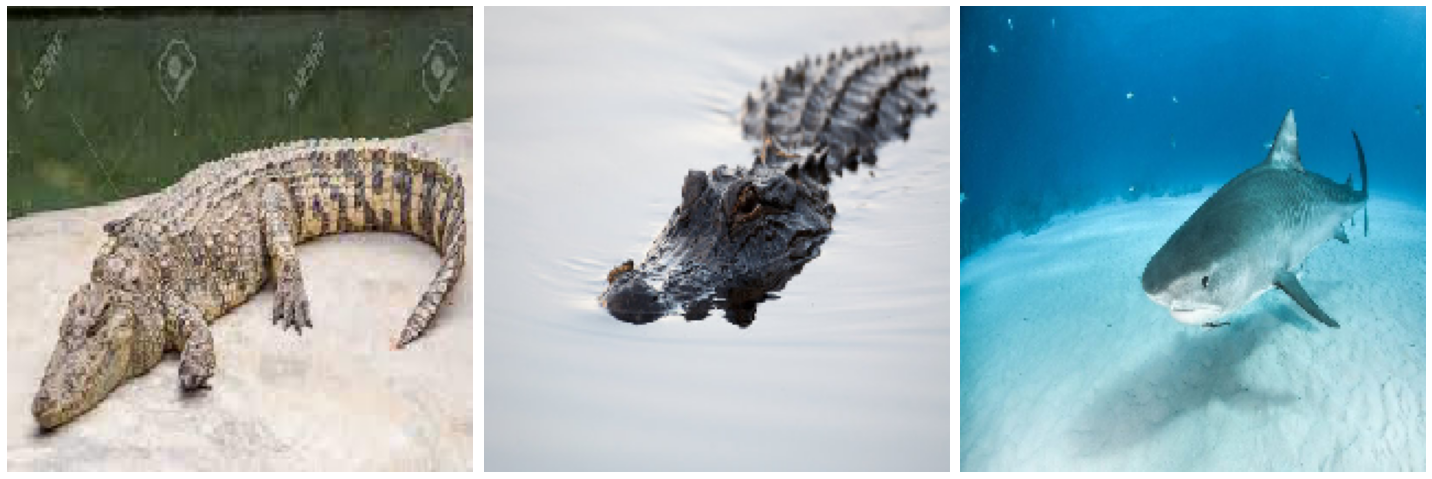

In [14]:
plotImages(sample_training_images[:3])

In [15]:
model = Sequential([
    Conv2D(16,3,padding = 'same', activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128,3,padding = 'same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(2,activation = 'softmax')
])

In [16]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 212, 212, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 106, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 106, 106, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        1

In [18]:
batch_size = 32
epochs = 20

In [19]:
num_Crocodiles_train = len(os.listdir(train_Crocodiles_dir))
num_Sharks_train = len(os.listdir(train_Sharks_dir))

num_Crocodiles_test = len(os.listdir(test_Crocodiles_dir))
num_Sharks_test = len(os.listdir(test_Sharks_dir))

total_train = num_Crocodiles_train+num_Sharks_train
total_test = num_Crocodiles_test + num_Sharks_test

In [20]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("Dataset/train/Sharks").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [21]:
history = model.fit(
          train_data_gen,
          steps_per_epoch = total_train//batch_size,
          epochs=epochs,
          validation_data = test_data_gen,
          validation_steps = total_test//batch_size,
          callbacks = [tf.keras.callbacks.EarlyStopping(
               monitor = 'val_loss',
               min_delta=0.01,
               patience =7)])

Epoch 1/20
7/7 [==============================] - 12s 2s/step - loss: 0.8403 - accuracy: 0.6339 - val_loss: 0.6906 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6535 - accuracy: 0.6200 - val_loss: 0.5987 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.4263 - accuracy: 0.8000 - val_loss: 0.3556 - val_accuracy: 0.8594
Epoch 4/20
7/7 [==============================] - 9s 2s/step - loss: 0.2809 - accuracy: 0.9000 - val_loss: 0.1887 - val_accuracy: 0.9375
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.2930 - accuracy: 0.8850 - val_loss: 0.3007 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.3056 - accuracy: 0.8700 - val_loss: 0.2781 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2360 - accuracy: 0.9100 - val_loss: 0.1978 - val_accuracy: 0.9531
Epoch 8/20
7/7 [=======================

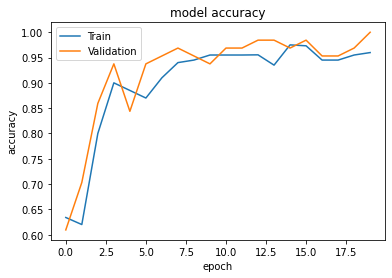

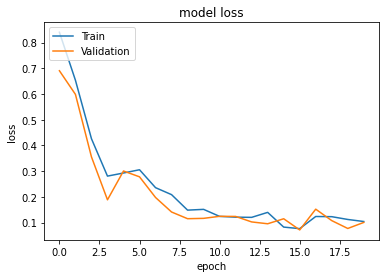

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
from skimage.transform import resize

In [26]:
my_image = plt.imread("Dataset/test/Sharks/00000085.jpg")

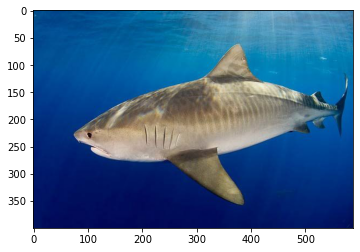

In [27]:
my_image_resized = resize(my_image,(212,212,3))
img = plt.imshow(my_image)

In [28]:
probabilities = model.predict(np.array([my_image_resized]))

1/1 [==============================] - 0s 243ms/step


In [29]:
number_to_class = ['Crocodile','Shark']

In [30]:
index = np.argsort(probabilities[0,:])
print("Most Likely class:", number_to_class[index[1]],"--Probability:",\
     probabilities[0,index[1]])

Most Likely class: Shark --Probability: 0.9999523
